<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Collegeadmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#wrangling
import pandas as pd
import numpy as np

#visualization
from matplotlib import pyplot as plt
import seaborn as sns

#machine learning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science projects/Probability of going to college (Logistic Regress)/data.csv'
data = pd.read_csv(path)
print(data.head())
data.mean()

  type_school school_accreditation  gender         interest residence  \
0    Academic                    A    Male  Less Interested     Urban   
1    Academic                    A    Male  Less Interested     Urban   
2    Academic                    B  Female  Very Interested     Urban   
3  Vocational                    B    Male  Very Interested     Rural   
4    Academic                    A  Female  Very Interested     Urban   

   parent_age  parent_salary  house_area  average_grades  \
0          56        6950000        83.0           84.09   
1          57        4410000        76.8           86.91   
2          50        6500000        80.6           87.43   
3          49        6600000        78.2           82.12   
4          57        5250000        75.1           86.79   

   parent_was_in_college  in_college  
0                  False        True  
1                  False        True  
2                  False        True  
3                   True        True  
4    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


parent_age               5.220800e+01
parent_salary            5.381570e+06
house_area               7.451530e+01
average_grades           8.609720e+01
parent_was_in_college    5.200000e-01
in_college               5.000000e-01
dtype: float64

In [26]:
print(data.isna().isna().sum())
data.describe()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64


,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [27]:
data.isnull().sum()
#if I wanted to find rows with null values for a particular column you can use list comprehension
#data[data['house_area].isnull()] OR 
#data[data['house_area].isna()]

#can also drop rows with na in specific columns
#data.dropna(subset= ['parent_salary', 'gender'])

def printLevels(datainput):
  for column in datainput:
    uniquevalues = np.unique(datainput[column])
    Numof_values = len(uniquevalues)
    if Numof_values < 10:
      print('The number of values for feature "{}" is: {} ---- {} '.format(column, Numof_values, uniquevalues))

printLevels(data)

The number of values for feature "type_school" is: 2 ---- ['Academic' 'Vocational'] 
The number of values for feature "school_accreditation" is: 2 ---- ['A' 'B'] 
The number of values for feature "gender" is: 2 ---- ['Female' 'Male'] 
The number of values for feature "interest" is: 5 ---- ['Less Interested' 'Not Interested' 'Quiet Interested' 'Uncertain'
 'Very Interested'] 
The number of values for feature "residence" is: 2 ---- ['Rural' 'Urban'] 
The number of values for feature "parent_was_in_college" is: 2 ---- [False  True] 
The number of values for feature "in_college" is: 2 ---- [False  True] 


In [28]:
data['interest'].value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

Since we dont understand what 'Quiet Interested', Im going to just drop the category as a whole. We will also inspect other columns to see if we need to drop or dumbify them

In [29]:
data = data.drop('interest', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [30]:
data['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [31]:
#academic = 1, vocational = 0 (for future analysis)
data['type_school'] = [1 if i == 'Academic' else 0 for i in data['type_school']] 
print(data['type_school'].value_counts())
data.head()

1    609
0    391
Name: type_school, dtype: int64


,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,A,Male,Urban,56,6950000,83.0,84.09,False,True
1,1,A,Male,Urban,57,4410000,76.8,86.91,False,True
2,1,B,Female,Urban,50,6500000,80.6,87.43,False,True
3,0,B,Male,Rural,49,6600000,78.2,82.12,True,True
4,1,A,Female,Urban,57,5250000,75.1,86.79,False,False


In [32]:
data['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [33]:
# school accreditation: 1 = A, 0 = B
data['school_accreditation'] = [1 if i == 'A' else 0 for i in data['school_accreditation']] 
print(data['type_school'].value_counts())
data.head()

1    609
0    391
Name: type_school, dtype: int64


,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,1,Male,Urban,56,6950000,83.0,84.09,False,True
1,1,1,Male,Urban,57,4410000,76.8,86.91,False,True
2,1,0,Female,Urban,50,6500000,80.6,87.43,False,True
3,0,0,Male,Rural,49,6600000,78.2,82.12,True,True
4,1,1,Female,Urban,57,5250000,75.1,86.79,False,False


In [34]:
#gender: 1 = MALE 0 = FEMALE
data['gender'] = [1 if i == 'Male' else 0 for i in data['gender']] 

#residence: 1 = URBAN 0 = rural
data['residence'] = [1 if i == 'Urban' else 0 for i in data['residence']] 
data.head()

,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,1,1,1,56,6950000,83.0,84.09,False,True
1,1,1,1,1,57,4410000,76.8,86.91,False,True
2,1,0,0,1,50,6500000,80.6,87.43,False,True
3,0,0,1,0,49,6600000,78.2,82.12,True,True
4,1,1,0,1,57,5250000,75.1,86.79,False,False


In [35]:
#parent_was_in_college: 1 = TRUE 0 = FALSE
data['parent_was_in_college'] = [1 if i == True else 0 for i in data['parent_was_in_college']] 

# #formatting our yinput here to binary
# #in_college: 1 = True 0 = False
data['in_college'] = [1 if i == True else 0 for i in data['in_college']] 

data.head()

,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,1,1,1,56,6950000,83.0,84.09,0,1
1,1,1,1,1,57,4410000,76.8,86.91,0,1
2,1,0,0,1,50,6500000,80.6,87.43,0,1
3,0,0,1,0,49,6600000,78.2,82.12,1,1
4,1,1,0,1,57,5250000,75.1,86.79,0,0


In [36]:
print(data['parent_was_in_college'].value_counts())
print(data['in_college'].value_counts())

1    520
0    480
Name: parent_was_in_college, dtype: int64
1    500
0    500
Name: in_college, dtype: int64


According to documentation on this data, this data was artifically generated but mimics a similar dataset. This probably explains why exactly half of our data set has a parent in college. Next We will perform some visualization to get an idea of how our data is distributed before we run our logistic regression

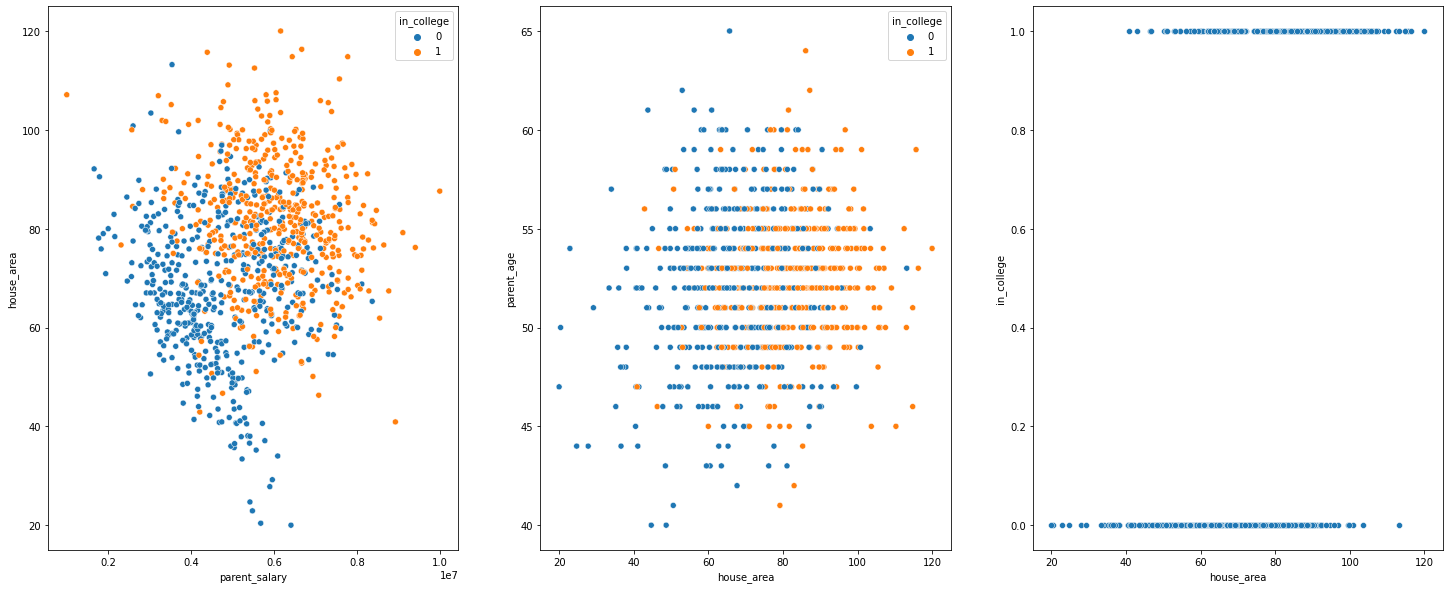

In [37]:
fig, axs = plt.subplots(ncols=3, figsize=(25,10))
sns.scatterplot(x= 'parent_salary', y= 'house_area', data= data, ax=axs[0], hue= data['in_college'])
sns.scatterplot(x= 'house_area', y= 'parent_age', data= data, ax=axs[1], hue= data['in_college'])
sns.scatterplot(x= 'house_area', y= 'in_college', data= data, ax=axs[2])

Notes about data:
Parent salary vs house area is pretty noisy but there still seems to be a point of separation. An SVM would easily be able to determine a line that divides the two outcomes. Generally speaking, it seems like the higher the salary and house area, the more likely the child will go to college

Also, in the house area vs parent age chart, the data is not as noisy, however, there is still seems to be a strong correlation between House area and our output column(in college)

Below we will start building our regression model by declaring our X and Y and splitting the data into our training and testing set

In [38]:
X = data.iloc[:, :-1]
y = data.iloc[0:, -1]

X.insert(0, "intercept", 1)
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [39]:
#We will use this module to perform our cross fold validation with K = 5
kf = KFold(n_splits= 5,shuffle= True, random_state=123)
logisticRegr = LogisticRegression()
LinearRegr = LinearRegression()

kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(LinearRegr,X_train,y_train,cv=kf)

# models = [logisticRegr, LinearRegression]

# def workmodel(model, Xinput, yinput):

#   kf = KFold(n_splits=5)

#   for train_index, test_index in kf.split(Xinput):
#     X_train, X_test = Xinput[train_index], Xinput[test_index]
#     y_train, y_test = yinput[train_index], yinput[test_index]

#     model.fit(Xinput, yinput)
#     predictions = model.predict(X_test)
#     score = r2_score(y_test, predictions)
#     rmse = mean_squared_error(y_test, predictions, squared=False)
#     coeff = model.coef_


#     print('Model Predictions: {}\nR2Score: {}\nRMSEScore: {}\nCoefficients: {}'.format(predictions[0:10, :], score, rmse, coeff))


In [41]:
cv_scores

array([0.46643976, 0.48622682, 0.48491411, 0.52045359, 0.52666359])

In [43]:
cv_scores2 = cross_val_score(logisticRegr,X_train,y_train,cv=kf)
cv_scores2

array([0.45333333, 0.52666667, 0.5       , 0.52      , 0.52      ])

In [45]:
print(cv_scores.mean(), cv_scores2.mean())

0.496939576029661 0.504


According to our cross evaluation, A logistic. regression fits best with our data. Lets take a deeper look at it to see if it can be tuned. Then we will test it with our out of sample data

AttributeError: ignored